# Pandas Assignment on Diamonds Dataset

The Diamonds csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension <br>

**Expecting that you plot charts/graphs wherever you can**

### Find Answers to the following Questions:
1. Remove the unnamed column from the dataframe.
2. Create a new column called as "volume"(volume=x*y*z)
3. Convert every column containing categorical values(like cut, color) to numerical values(0,1..so on)
3. What is the average price of a diamond for every color? Plot a chart to validate.
4. For every color of the diamond, Plot a graph of average price & average carat value on the same graph.
5. Find out the carat value, depth value of diamond having the highest price.
6. Plot the histogram of the price & carat column.
7. Which cut of diamonds have the highest average price? Plot a chart to validate.
8. Find the number of diamonds with maximum price/volume for each colour. Plot a chart to validate.
9. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.
10. Which columns are strongly correlated to the price column?

In [1]:
import pandas as pd
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
tup=df['x']*df['y']*df['z']
df['volume']=tup
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [4]:
dict1={'Ideal':0,'Premium':1,'Very Good':2,'Good':3,'Fair':4}
dict2={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
dict3={'SI1':0,'VS2':1,'SI2':2,'VS1':3,'VVS2':4,'VVS1':5,'IF':6,'I1':7}
df['cut']=df['cut'].apply(lambda x:dict1[x])
df['color']=df['color'].apply(lambda x:dict2[x])
df['clarity']=df['clarity'].apply(lambda x:dict3[x])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,0,1,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,1,5,1,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,3,6,2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [5]:
import matplotlib.pyplot as plt
color_group = df.groupby('color')
color = []
avgprice = []
for name, group in color_group:
    color.append(name)
    avgprice.append(group['price'].mean())

plt.figure(figsize=(10,5))
plt.bar(color, avgprice, label='Average Price')
plt.legend()
plt.grid()
plt.show()

<Figure size 1000x500 with 1 Axes>

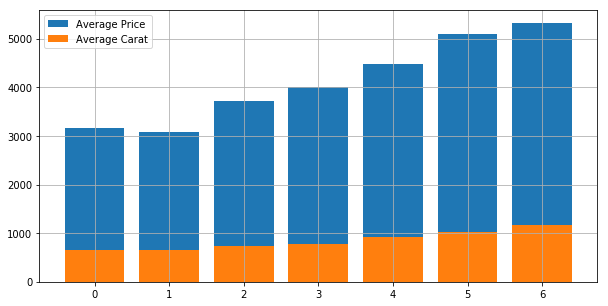

In [6]:

color_group = df.groupby('color')
color = []
avgprice = []
avgcarat=[]
for name, group in color_group:
    color.append(name)
    avgprice.append(group['price'].mean())
    avgcarat.append(group['carat'].mean()*1000)
plt.figure(figsize=(10,5))
plt.bar(color, avgprice, label='Average Price')
plt.bar(color, avgcarat, label='Average Carat')
plt.legend()
plt.grid()
plt.show()

In [7]:
df[['price']].max()

price    18823
dtype: int64

In [8]:
df[(df['price']==18823)][['depth','carat']]

,depth,carat
27749,60.8,2.29


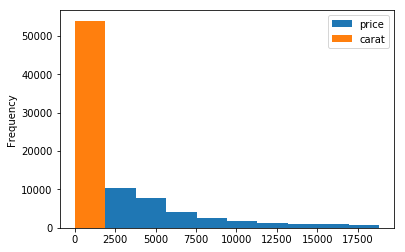

In [9]:
df[['price','carat']].plot(kind='hist')

4


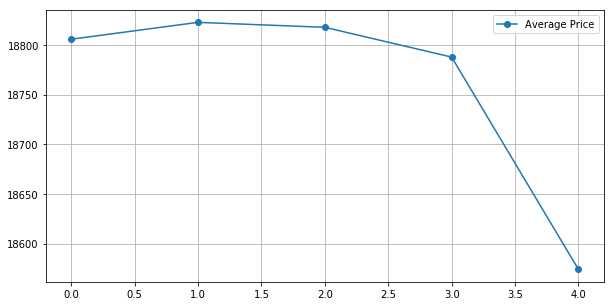

[0, 1, 2, 3, 4]

In [10]:
import matplotlib.pyplot as plt
cut_group = df.groupby('cut')
cut = []
price= []
for name, group in cut_group:
    cut.append(name)
    price.append(group['price'].max().mean())
print(max(cut))
plt.figure(figsize=(10,5))
plt.plot(cut,price, label='Average Price',marker='o')
plt.legend()
plt.grid()
plt.show()
cut

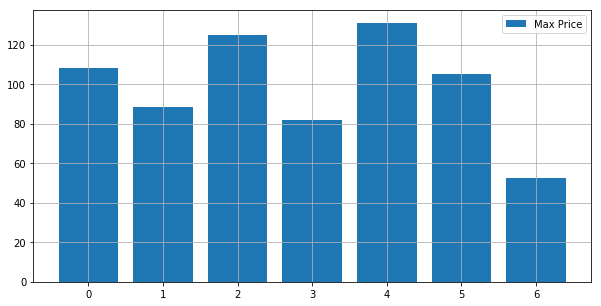

In [23]:
pd.set_option('mode.chained_assignment', None)
df2 = df[df['volume'] != 0]
df2['price/volume'] = df['price']/df['volume']

color_group = df2.groupby('color')
color = []
maxpricebyvol = []
for name, group in color_group:
    color.append(name)
    maxpricebyvol.append(group['price/volume'].max())
plt.figure(figsize=(10,5))
plt.bar(color, maxpricebyvol, label='Max Price')
plt.legend()
plt.grid()
plt.show()

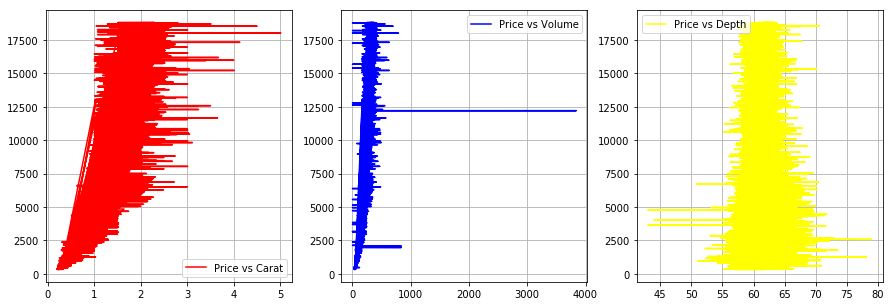

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1) 
plt.plot(df['carat'],df['price'],color='red',label='Price vs Carat')
plt.grid()
plt.legend()

plt.subplot(1,3,2) 
plt.plot(df['volume'],df['price'],color='blue',label='Price vs Volume')
plt.grid()
plt.legend()

plt.subplot(1,3,3) 
plt.plot(df['depth'],df['price'],color='yellow',label='Price vs Depth')
plt.grid()
plt.legend()

plt.show()

In [15]:
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
carat,1.000000,0.134967,0.291437,-0.155192,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.976308
cut,0.134967,1.000000,0.020519,-0.092976,0.218055,0.433405,0.053491,0.125565,0.121462,0.149323,0.118368
color,0.291437,0.020519,1.000000,0.042142,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,0.284267
clarity,-0.155192,-0.092976,0.042142,1.000000,-0.024337,-0.094350,-0.083125,-0.182734,-0.176540,-0.179684,-0.150791
depth,0.028224,0.218055,0.047279,-0.024337,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.009157
table,0.181618,0.433405,0.026465,-0.094350,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.167400
price,0.921591,0.053491,0.172511,-0.083125,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.902385
x,0.975094,0.125565,0.270287,-0.182734,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.956564
y,0.951722,0.121462,0.263584,-0.176540,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.975143
z,0.953387,0.149323,0.268227,-0.179684,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.950065


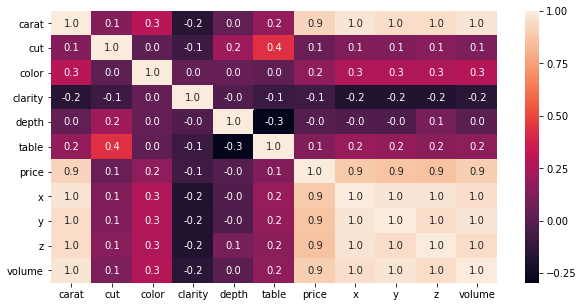

In [18]:
import seaborn as sb
plt.figure(figsize=(10,5))
sb.heatmap(df.corr(),annot=True,fmt ='.1f')